In [27]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist



#for map 
import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

In [28]:
### The first step is to visualize the data in order to understand it. Let's show a table.
temperature=pd.read_csv("temperat.csv", sep=";")
temperature=temperature.rename(columns={'Unnamed: 0': 'Ville'}) # renaming the first column
print(temperature)


            Ville  Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  \
0       Amsterdam      2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1   
1         Athenes      9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2   
2          Berlin     -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0   
3       Bruxelles      3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8   
4        Budapest     -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3   
5      Copenhague     -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6   
6          Dublin      4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6   
7        Helsinki     -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9   
8            Kiev     -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5   
9        Cracovie     -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6   
10       Lisbonne     10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9   
11        Londres      3.4      4.2   5.5    8.3  11

In [29]:
### The second step is to draw some statistics from the data.
temperature.describe()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,48.980000,10.590286
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.199869,12.362187
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.400000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,3.200000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.600000


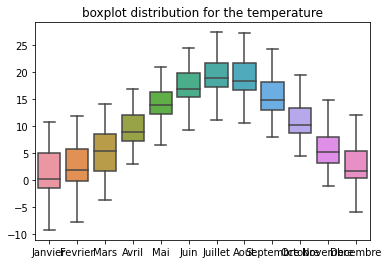

In [30]:
### Let's present these results on a boxplot using Seasborne, as there is still a lot of data. 
plt.figure()
plt.title("boxplot distribution for the temperature")
temperature_boxplot=sns.boxplot(data=temperature.drop(["Moyenne", "Amplitude","Latitude","Longitude","Region"], axis=1))

What value do you want to visualize ( Amplitude, Moyenne, etc) ? 
Amplitude


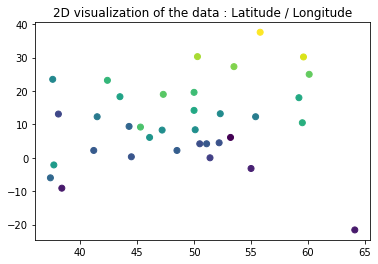

In [31]:
### Represented like this, we can't extract clusters, so let's represent it differently
value_to_visualize = input("What value do you want to visualize ( Amplitude, Moyenne, etc) ? \n") #so we can explore the data better
plt.figure()
plt.title("2D visualization of the data : Latitude / Longitude")
plt.scatter(temperature["Latitude"], temperature["Longitude"],c=temperature[value_to_visualize]) 


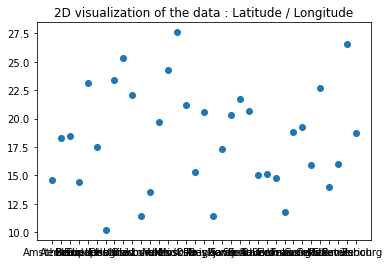

In [32]:
### Let's now present the temperature according to the city
plt.figure()
plt.title("2D visualization of the data : Latitude / Longitude")
plt.scatter(temperature["Ville"], temperature[value_to_visualize])

In [33]:
# We will now display all the points on a map
file=temperature
field_used=value_to_visualize

map = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])
map


linear=cm.linear.RdYlBu_06.scale(0, 1)

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[field_used]), 
                        line_color=None,
                        fill_color=linear(1-(row[field_used]-file[field_used].min())/(file[field_used].max()-file[field_used].min())),
                        fill_opacity=1,
                        color=linear(1-(row[field_used]-file[field_used].min())/(file[field_used].max()-file[field_used].min()))).add_to(map)
    


In [34]:
map



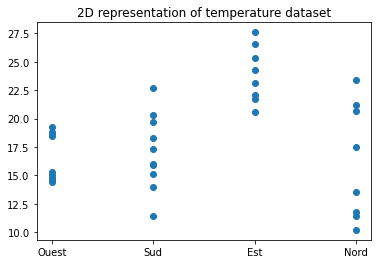

In [35]:
### We can see the results are relevant and correspond to what we expected. 
 # Let's now see the data of the mean temperature by region 

plt.figure()
plt.title('2D representation of temperature dataset')
plt.scatter(temperature['Region'], temperature[field_used]) #or change by Moyenne
plt.show()


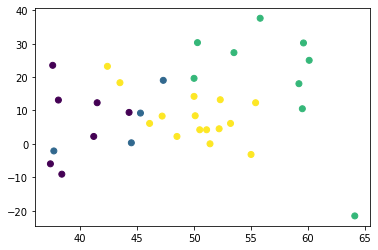

In [36]:
# We can see that for different fields ( Moyenne / Amplitude), there are a lot of disparities in the given regions.
# Let's use our knowledge in clustering to find clusters to regroup cities with similar caracteristics.


#Let's try to find clusters: 
plt.figure()

new_temp = temperature.drop(['Ville','Region','Latitude','Longitude',"Amplitude","Moyenne" ], axis=1)

kmeans = KMeans(n_clusters=4,n_init=10,init='random').fit(new_temp) #trying to find 4 clusters, 4 being a purely aritrairy number
centers=kmeans.cluster_centers_
kmeans.labels_
plt.scatter(temperature['Latitude'], temperature['Longitude'],c=kmeans.labels_) # === draw on map = better

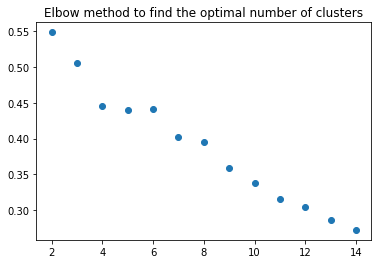

In [37]:
##Let's do the Elbow method to find the optimal number of clusters, using the silhouette score to compute the cost
range_n_clusters = range(2,15) #trying to find the optimal number of clusters which suits best our dataset ( that has "30~cities")
sil_score = []

for n in range_n_clusters:
    sil_mean=[]
    for i in range(20): # so we compute it 20 times and take the mean to know exatly wich number of clusters would be better
        clusterer = KMeans(n_clusters=n, n_init=13, init = 'random').fit(new_temp) # Clustering with the given number of clusters
        cluster_labels = clusterer.labels_ # Extract the labels of each cluster
        silhouette_avg = silhouette_score(new_temp, cluster_labels) # Corresponding silhouette score
        sil_mean.append(silhouette_avg) # Adding the silhouette score corresponding to the number of clusters to our list so 
    sil_score.append(np.mean(sil_mean))                      # we can print it afterward
    #print("For n =", n, "Silhouette_score:", silhouette_avg) 
plt.figure()
plt.title('Elbow method to find the optimal number of clusters')
plt.scatter(range_n_clusters, sil_score)

In [38]:
# When running several times the function below we get 5 or sometimes 6 clusters as the optimal number. We will continue with 5 ! 
# but first, let's see what happens when we use 5 clusters and visualize it on the map
kmeans = KMeans(n_clusters=5,n_init=10,init='random').fit(new_temp)

new_temp_with_labels=pd.concat([temperature,pd.DataFrame(data=kmeans.labels_,columns=['label'])], axis=1, sort=False)
#We select the file we're going to use
file=new_temp_with_labels
field_used='label'

linear=cm.linear.RdYlBu_06.scale(0, 1)


map2 = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[field_used]), 
                        line_color=None,
                        fill_color=linear(1-(row[field_used]-file[field_used].min())/(file[field_used].max()-file[field_used].min())),
                        fill_opacity=1,
                        color=linear(1-(row[field_used]-file[field_used].min())/(file[field_used].max()-file[field_used].min()))).add_to(map2)
map2    

In [39]:
""" We can see that proximity in term of distance is often related to proximity in terms of temperature, which is logic, but some points have the same climate and are very far away.
That means there is another factor that creates the climate. It could be the proximity with the ocean, or altitude
(naively : we know there are several types of climate, for example continental climate whose major caracteristic is the really high
amplitude. Let's try to study this amplitude ! )
"""
## We will now try to regroup the different amplituds for the temperature and try to find which are the similar ones : we know that
# a continental climate is when there is a huge amplitude, so let's see if it's correlated with the geographic position
temp_amplitude=temperature[['Ville','Amplitude']]

temp_ampl_no_city=temperature['Amplitude'].reset_index()

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_ampl = KMeans(n_clusters=n, n_init=10).fit(temp_ampl_no_city) # Clustering with the given number of clusters
    cluster_labels = kmeans_ampl.labels_ # Extract the labels
    silhouette_avg = silhouette_score(temp_ampl_no_city, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    #print("For n =", n, "Silhouette_score:", silhouette_avg)
    
y=temp_amplitude.sort_values(by='Amplitude')
map_for_ampl=pd.concat([temperature,pd.DataFrame(data=kmeans_ampl.labels_,columns=['cluster_labels'])], axis=1, sort=False)
field_used='cluster_labels'
file=map_for_ampl
map3 = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[field_used]), 
                        line_color=None,
                        fill_color=linear(1-(row[field_used]-file[field_used].min())/(file[field_used].max()-file[field_used].min())),
                        fill_opacity=1,
                        color=linear(1-(row[field_used]-file[field_used].min())/(file[field_used].max()-file[field_used].min()))).add_to(map3)
map3  
### TO DISPLAY ON MAP

In [44]:
#The results aren't very simple so we can't find which type of climate a city belongs to without more data about the cities.


### Let's now try to see for each group obtained with the 5 clusters obtained previously 
# if we can draw seasons from them to see how many seasons would there be
group1=new_temp_with_labels[new_temp_with_labels['label']==0]
group2=new_temp_with_labels[new_temp_with_labels['label']==1]
group3=new_temp_with_labels[new_temp_with_labels['label']==2]
group4=new_temp_with_labels[new_temp_with_labels['label']==3]
group5=new_temp_with_labels[new_temp_with_labels['label']==4]


#now we do k-means but to get the seasons ( beginning on group 2)

group2_month=group2.drop(['Ville','Moyenne','Amplitude','Latitude','Longitude','Region','label'],axis=1)

#We first need to transpose our dataset
group2_month_rev=group2_month.T
group2_month_rev_clean=group2_month_rev.reset_index().drop(['index'],axis=1)

#and now we perform k-means on the reverted dataframe

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_seasons = KMeans(n_clusters=n, n_init=10).fit(group2_month_rev_clean) # Clustering with the given number of clusters
    cluster_labels = kmeans_seasons.labels_ # Extract the labels
    silhouette_avg = silhouette_score(group2_month_rev_clean, cluster_labels) # Corresponding silhouette score
   
    # Display the results
   # print("For n =", n, "Silhouette_score:", silhouette_avg)
    
    
#We focus on group 2 and choose k=2 or k=5
# k=2

kmeans_seasons = KMeans(n_clusters=2,n_init=10,init='random').fit(group2_month_rev_clean)
print( " months that are together if there were two seasons : ", kmeans_seasons.labels_ )



#k=5
kmeans_seasons = KMeans(n_clusters=5,n_init=10,init='random').fit(group2_month_rev_clean)
print( " months that are together if there were five seasons : ", kmeans_seasons.labels_ ) 
#group2 


 months that are together if there were two seasons :  [0 0 0 0 1 1 1 1 1 0 0 0]
 months that are together if there were five seasons :  [2 2 0 3 1 4 4 4 1 3 0 2]


,Ville,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region,label
7,Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord,1
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est,1
13,Minsk,-6.9,-6.2,-1.9,5.4,12.4,15.9,17.4,16.3,11.6,5.8,0.1,-4.2,5.5,24.3,53.5,27.3,Est,1
14,Moscou,-9.3,-7.6,-2.0,6.0,13.0,16.6,18.3,16.7,11.2,5.1,-1.1,-6.0,5.1,27.6,55.8,37.6,Est,1
15,Oslo,-4.3,-3.8,-0.6,4.4,10.3,14.9,16.9,15.4,11.1,5.7,0.5,-2.9,5.6,21.2,59.5,10.5,Nord,1
18,Reykjavik,-0.3,0.1,0.8,2.9,6.5,9.3,11.1,10.6,7.9,4.5,1.7,0.2,4.6,11.4,64.1,-21.6,Nord,1
22,Stockholm,-3.5,-3.5,-1.3,3.5,9.2,14.6,17.2,16.0,11.7,6.5,1.7,-1.6,5.8,20.7,59.2,18.0,Nord,1
33,StPetersbourg,-8.2,-7.9,-3.7,3.2,10.0,15.4,18.4,16.9,11.5,5.2,-0.4,-5.3,4.5,26.6,59.6,30.2,Est,1


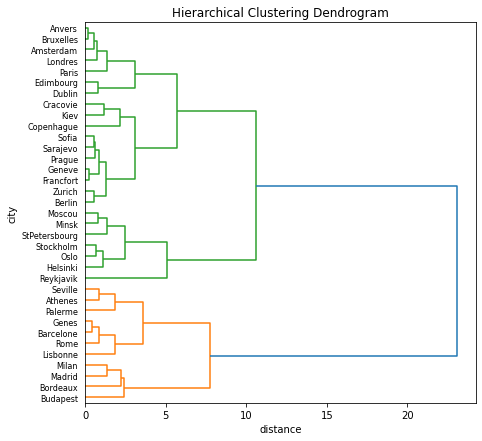

In [41]:

#Now we are going to perform hierarchical clustering

# We standardize the columns of interest
new_temp_scaled=pd.DataFrame(scale(new_temp),columns=new_temp.columns,index=new_temp.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe


# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(new_temp_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default

# We represent the corresponding Dendrogram

#Since we want to display the Dendrogram with cities and not just index, we create the label_city list

label_city=[]
for index,row in temperature.iterrows():
    label_city.append(row['Ville'])
    
#And now we can plot
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('city')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
    labels=label_city
)
plt.show()

#And here is the dendrogram !! 